<a href="https://colab.research.google.com/github/Wasim-Zaman/deep_learning_with_tensorflow/blob/main/003_Computer_Vision_%26_Convolutional_Neural_Network_With_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducation to Convolutional Neural Network and Computer Vision

## Computer Vision Definition

Computer Vision is all about writing algorithms that can discover patterns in visual data such as camera of self driving car recognizes the obstacles, cars and other things coming in front.

## Getting the data before creating CNN

In order to create a computer vision model or convolutional neural network, we need some kind of data to work on

## Downloading the zip data & unzipping it

In [1]:
import zipfile

# Downloading the data into the google colab
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzipping the data (extracting it for use)
zip_file = zipfile.ZipFile('pizza_steak.zip')
zip_file.extractall()

--2022-11-07 15:04:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.1.128, 108.177.121.128, 108.177.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.1.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   141MB/s    in 0.7s    

2022-11-07 15:04:53 (141 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

now that we have the zip file downloaded, and we have data as well. It is now time to see how the data looks like before actually writing or creating model for it to understand patterns in it

In [2]:
# inspect the parent directory

!ls pizza_steak # ls means list the existing directory we have

test  train


In [3]:
# inspect the train folder in the parent folder 
!ls pizza_steak/train/

pizza  steak


In [4]:
# inspect the pizza inside the train folder
!ls pizza_steak/train/pizza/

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

Wow.... It means that we have so many pictures available, let's now see how many images we have in each single directory

In [5]:
# Walking through all the directories and all the files inside the directory
import os

# !ls pizza_steak/train/pizza/
# !ls pizza_steak/train/steak/
# !ls pizza_steak/test/pizza/
# !ls pizza_steak/test/steak/

for dir_path, dir_name, file_name in os.walk('pizza_steak'):
  print (f"There are {len(dir_name)} directories and {len(file_name)} files in {dir_path} .") 

There are 2 directories and 0 files in pizza_steak .
There are 2 directories and 0 files in pizza_steak/test .
There are 0 directories and 250 files in pizza_steak/test/steak .
There are 0 directories and 250 files in pizza_steak/test/pizza .
There are 2 directories and 0 files in pizza_steak/train .
There are 0 directories and 750 files in pizza_steak/train/steak .
There are 0 directories and 750 files in pizza_steak/train/pizza .


Besides this, we can inspect images inside the directory in another way as well.

In [6]:
# Another way to see the number of images
number_of_pizza_images = len(os.listdir('pizza_steak/train/pizza'))
print(number_of_pizza_images)

750


# Visualizing Images

The best way to inspect the images is to plot random images.
but before that we need to identify classes programmaticaly.
Let's see what we are trying to say....

In [7]:
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')   # directory path to train data
print (data_dir)

# let's create a list of classes programmatically
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print (class_names)

pizza_steak/train
['pizza' 'steak']


## Visualizing random image

In [10]:
def plot_random_image(root_dir, test_or_train, class_name):
  '''
  Accepts arguments as String then plots random image and return that image as well
  '''
  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg
  import random
  import os

  # Setting the target directory from where the image would plot
  target_dir = root_dir + '/' + test_or_train + '/' + class_name

  # picking the random image out of all the images
  rand_image = random.choice(os.listdir(target_dir))

  # Reading the image from target file into the np array
  img = mpimg.imread(target_dir + '/' + rand_image)

  # Ploting the image using matplotlib
  # plt.figure(figsize=(7, 7))
  plt.imshow(img)
  plt.title(class_name)
  plt.axis('off')
  
  print (f"The shape of the image is: {img.shape}")

  # returning the image to the called function
  return img



The shape of the image is: (384, 512, 3)


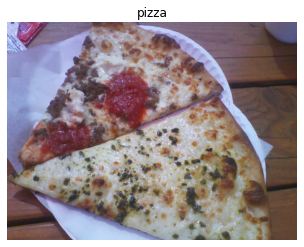

In [11]:
img = plot_random_image(root_dir='pizza_steak', test_or_train='train', class_name='pizza')

The reason why we returned the img is because we want an image in tensor.
Because these tensors would be later on used as an input to our model

In [12]:
import tensorflow as tf

# converting img (array) into tensor
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[181, 199, 239],
        [183, 196, 238],
        [192, 201, 244],
        ...,
        [ 93,  87, 131],
        [ 93,  87, 131],
        [ 93,  87, 131]],

       [[170, 185, 224],
        [171, 183, 223],
        [183, 190, 232],
        ...,
        [ 94,  88, 132],
        [ 94,  88, 132],
        [ 94,  88, 132]],

       [[191, 203, 241],
        [195, 204, 243],
        [197, 202, 242],
        ...,
        [ 94,  88, 132],
        [ 94,  88, 132],
        [ 94,  88, 132]],

       ...,

       [[110,  74,  62],
        [111,  75,  63],
        [111,  75,  63],
        ...,
        [ 95,  65,  54],
        [ 95,  65,  54],
        [ 95,  65,  54]],

       [[103,  71,  58],
        [103,  71,  58],
        [104,  72,  59],
        ...,
        [ 95,  66,  48],
        [ 95,  66,  48],
        [ 95,  66,  48]],

       [[ 99,  69,  58],
        [100,  71,  57],
        [100,  71,  57],
        ...,
        [ 94,  66,  4

## Meaning of the shape of the img

In [13]:
img.shape

(384, 512, 3)

The img is nothing but 512 by 512 (in pixel) image and the 3 in the shape represents three color channels (red, green, blue)

Each and every pixel in width 512 and height 512 shows some kind of three color combination.


(512, 512, 3) 
The first 512 shows the height in pixel, second shows the width in pixel and third shows three color channels (r,g, b).

# Data preprocessing (Normalization/Scaling)

Often before creating a neural network, our first step is data preprocessing.
This means that before actually feeding the data into the network, first we convert it into tensors (which we already done), then our next step is to normalize the data (means converting each and every element in the data either into 1 or into 0)

For that let's complete our preprocessing step **Let's preprocess the data**

In [14]:
img_norm = img/255.

Since our image is just a color combination of three colors in r,g,b in other words each and every pixel has a value in between 0 and 255 (r,g,b range)

In [15]:
img_norm

array([[[0.70980392, 0.78039216, 0.9372549 ],
        [0.71764706, 0.76862745, 0.93333333],
        [0.75294118, 0.78823529, 0.95686275],
        ...,
        [0.36470588, 0.34117647, 0.51372549],
        [0.36470588, 0.34117647, 0.51372549],
        [0.36470588, 0.34117647, 0.51372549]],

       [[0.66666667, 0.7254902 , 0.87843137],
        [0.67058824, 0.71764706, 0.8745098 ],
        [0.71764706, 0.74509804, 0.90980392],
        ...,
        [0.36862745, 0.34509804, 0.51764706],
        [0.36862745, 0.34509804, 0.51764706],
        [0.36862745, 0.34509804, 0.51764706]],

       [[0.74901961, 0.79607843, 0.94509804],
        [0.76470588, 0.8       , 0.95294118],
        [0.77254902, 0.79215686, 0.94901961],
        ...,
        [0.36862745, 0.34509804, 0.51764706],
        [0.36862745, 0.34509804, 0.51764706],
        [0.36862745, 0.34509804, 0.51764706]],

       ...,

       [[0.43137255, 0.29019608, 0.24313725],
        [0.43529412, 0.29411765, 0.24705882],
        [0.43529412, 0

Since this is just a one image that we normalized, but what we need is to convert all of the images into normalized form. Which means that we only converted pixel of one image into normalized form, what we need to do is to preprocess all the image's pixels which is really not a difficult but time and memory consumig part to do. Because our data is not inside a python variable, it is inside the directories and for normalizing it, we will need to grab one by one image from the directory, put it into the variable and then normalize it.

**Instead of that** let's do something new. Let's import a library that will do same task for us but in batches.

In [16]:
# Steps to do

we are going to:

* Load the data from the directory
* Preprocess the data (convert each pixel of the image into 0/1 also known as normalization/scaling)
* Create a CNN model
* Compile the model
* Fit the model to our train data

In [28]:
# import the library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# setting the random seed
tf.random.set_seed(42)

# Load the data from the directory
train_dir = '/content/pizza_steak/train'
valid_dir = '/content/pizza_steak/test'

# Preprocess the data (normalize the data)
train_datagen = ImageDataGenerator(rescale=1./255)  # because the rgb has 255 range
valid_datagen = ImageDataGenerator(rescale=1./255)

# turn the data into batches and do the normalization 
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                               color_mode="rgb",
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=valid_dir,
                                              #  color_mode='rgb',
                                               batch_size=32,
                                               target_size=(224, 224),
                                               seed=42)

# creating a CNN model

model_1 = tf.keras.Sequential([
    # add two convolutional layers and one maxpool layer.
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),

    # Flatten the input
    tf.keras.layers.Flatten(),

    # one output hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# compiling the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

# Fitting the model on training data
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 10s 193ms/step - loss: 0.5735 - accuracy: 0.7000 - val_loss: 1.1174 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4108 - accuracy: 0.8240 - val_loss: 1.2317 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3927 - accuracy: 0.8333 - val_loss: 1.3069 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3608 - accuracy: 0.8493 - val_loss: 1.1949 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3131 - accuracy: 0.8680 - val_loss: 1.4606 - val_accuracy: 0.5000


In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 10s 195ms/step - loss: 0.5472 - accuracy: 0.7180 - val_loss: 0.3932 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4171 - accuracy: 0.8147 - val_loss: 0.3297 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3828 - accuracy: 0.8347 - val_loss: 0.3047 - val_accuracy: 0.8800
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3680 - accuracy: 0.8373 - val_loss: 0.3219 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3290 - accuracy: 0.8667 - val_loss: 0.2855 - val_accuracy: 0.8800
